# Credit Risk Modeling for Loan Repayment and Prediction using Sequential Neural Networks on LendingClub Data

A subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Aim is to use historical data on loans given out with information on whether or not the borrower defaulted (charge-off)to predict whether or not potential borrower will repay their loans. This helps develop assessment models to suggest the vulnerability of a loan to be paid back. 

The "loan_status" column contains our label.

----
-----
There are many LendingClub data sets on Kaggle. 
Here is the information on this particular data set:
<title>Data Overview</title>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')#info regarding the data

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [9]:
#Exploratory Data Analysis

In [10]:
# CODE HERE
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0


In [11]:
df_grade = df.groupby(['grade','sub_grade']).mean()
df_grade.transpose()


grade                            A                                            \
sub_grade                       A1            A2            A3            A4   
loan_amnt             12875.300648  12561.317550  13253.524489  13461.777187   
int_rate                  5.826852      6.512843      7.300806      7.683278   
installment             390.597301    384.086440    409.171187    416.193182   
annual_inc            91883.135007  84348.790796  85793.399002  81869.337551   
dti                      13.250914     14.187992     14.868537     14.985299   
open_acc                 11.831226     11.577715     11.416415     11.138324   
pub_rec                   0.029397      0.045887      0.072050      0.086009   
revol_bal             16123.123343  16236.045782  17474.444024  16836.475078   
revol_util               27.020130     32.839780     37.732240     41.900229   
total_acc                27.920341     27.067942     26.739126     26.101843   
mort_acc                  2.504562      2.295992      2.323727      2.146973   
pub_rec_bankruptcies      0.016977      0.028613      0.044402      0.058469   

grade                                          B                              \
sub_grade                       A5            B1            B2            B3   
loan_amnt             13774.906888  12654.388229  13091.600356  12926.023260   
int_rate                  8.474721      9.360482     10.381126     11.297359   
installment             422.266141    389.057327    408.585831    401.298937   
annual_inc            82909.407897  76249.985418  75705.213239  73422.748071   
dti                      15.469165     16.003890     16.342273     16.655627   
open_acc                 11.357660     11.225472     11.200934     11.104858   
pub_rec                   0.112868      0.154989      0.157324      0.163872   
revol_bal             17516.595325  16187.574184  16178.109669  15620.334909   
revol_util               45.450802     47.847558     51.095361     53.067648   
total_acc                26.368347     25.898290     25.590754     25.081748   
mort_acc                  2.156024      2.022317      1.957020      1.798991   
pub_rec_bankruptcies      0.079018      0.115226      0.115474      0.118056   

grade                                             ...             F  \
sub_grade                       B4            B5  ...            F1   
loan_amnt             13124.080114  12604.474757  ...  18634.085124   
int_rate                 12.100112     12.592390  ...     22.746570   
installment             407.662771    399.631293  ...    545.537692   
annual_inc            72373.736472  70383.448099  ...  75184.345727   
dti                      16.949962     17.183492  ...     19.430413   
open_acc                 11.163587     11.036541  ...     11.809672   
pub_rec                   0.175853      0.209373  ...      0.212104   
revol_bal             15642.381782  14786.809826  ...  16996.521493   
revol_util               54.456730     55.158967  ...     62.078347   
total_acc                25.212765     24.811094  ...     25.830317   
mort_acc                  1.790609      1.676822  ...      1.727864   
pub_rec_bankruptcies      0.125714      0.143168  ...      0.140108   

grade                                                                         \
sub_grade                       F2            F3            F4            F5   
loan_amnt             19326.807664  18708.070866  19557.960269  20825.375805   
int_rate                 23.403247     24.058736     24.534617     25.055827   
installment             573.444277    561.487310    587.722658    629.601432   
annual_inc            74702.466837  72953.682288  74306.593688  79425.613121   
dti                      19.718659     19.329519     19.187650     19.714753   
open_acc                 11.796095     11.495188     11.683268     12.072298   
pub_rec                   0.216197      0.195101      0.209849      0.198998   
revol_bal             16132.204989  15834.9

In [12]:
df['home_ownership'].nunique()

6

In [13]:
df['purpose'].nunique()

14

In [14]:
df['title'].nunique()

48817

In [15]:
df['application_type'].value_counts().nunique()

3

In [16]:
print(df[df['loan_status']=="Charged Off"]['grade'].value_counts())
#Grade C loans hold highest count amongst charged off loans
#C>D>B>E>F>A>G
charged_off_grade = df[df['loan_status']=="Charged Off"]['grade'].value_counts().values
grade = ['C','D','B','E','F','A','G']
cgrade = pd.DataFrame(charged_off_grade,index=grade,columns=['Aggregate Charge Offs'])
cgrade

C    22449
D    18338
B    14587
E    11765
F     5037
A     4036
G     1461
Name: grade, dtype: int64


,Aggregate Charge Offs
C,22449
D,18338
B,14587
E,11765
F,5037
A,4036
G,1461


In [17]:
loans_grade = df['grade'].value_counts().values
print(df['grade'].value_counts())
l_grade = ['B','C','A','D','E','F','G']
lgrade = pd.DataFrame(loans_grade,index=l_grade,columns=['Aggregate Loans'])
lgrade
df_loans_merge = pd.concat([lgrade,cgrade],join='inner',axis=1)
print(df_loans_merge)
df_loans_merge

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64
   Aggregate Loans  Aggregate Charge Offs
B           116018                  14587
C           105987                  22449
A            64187                   4036
D            63524                  18338
E            31488                  11765
F            11772                   5037
G             3054                   1461


,Aggregate Loans,Aggregate Charge Offs
B,116018,14587
C,105987,22449
A,64187,4036
D,63524,18338
E,31488,11765
F,11772,5037
G,3054,1461


In [18]:
df_loans_merge['percentage_charge_offs'] = (df_loans_merge['Aggregate Charge Offs']/df_loans_merge['Aggregate Loans'])*100
df_loans_merge
#Category G loans are poorest in terms of percentage as expected
#By aggregate number of charge-offs C performs poorest

,Aggregate Loans,Aggregate Charge Offs,percentage_charge_offs
B,116018,14587,12.573049
C,105987,22449,21.180900
A,64187,4036,6.287878
D,63524,18338,28.867829
E,31488,11765,37.363440
F,11772,5037,42.787971
G,3054,1461,47.838900


Text(0, 0.5, 'Percentage')

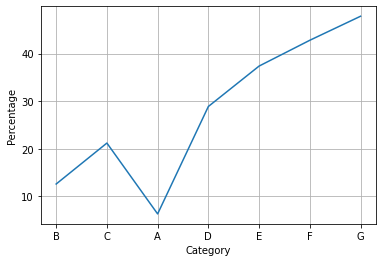

In [19]:
df_loans_merge['percentage_charge_offs'].plot()
plt.grid()
plt.xlabel('Category')
plt.ylabel('Percentage')

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

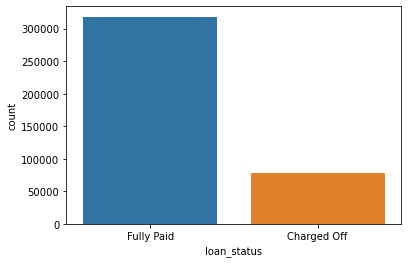

In [20]:
sns.countplot(x='loan_status', data=df)
df['loan_status'].value_counts()
#4:1 ratio approx

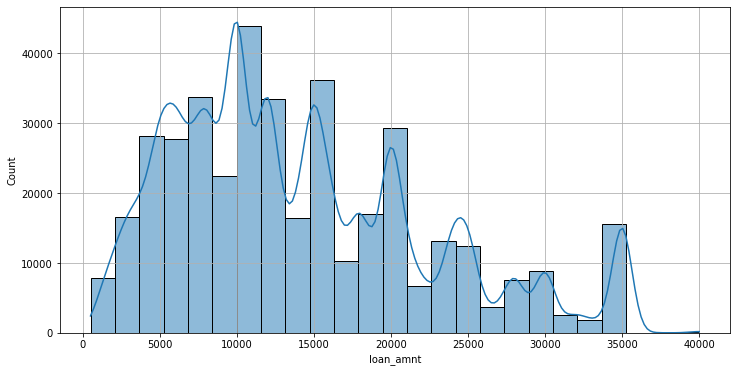

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['loan_amnt'],bins=25, kde=True)
plt.grid()
#Most frequent loans lie in the range 5000 to 15000

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

<AxesSubplot:>

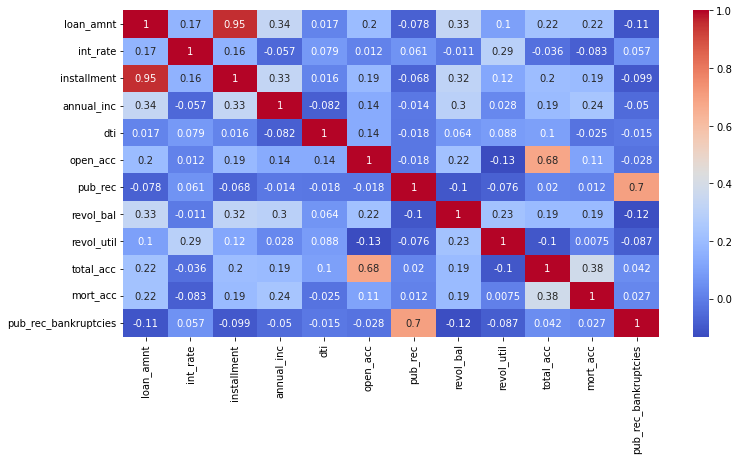

In [22]:
# CODE HERE
plt.figure(figsize=(12,6))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

In [23]:
print(feat_info('installment'))
#help(feat_info)
#df['installment']['Description']
print(feat_info('loan_amnt'))

The monthly payment owed by the borrower if the loan originates.
None
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
None


Text(0, 0.5, 'Loan Amount')

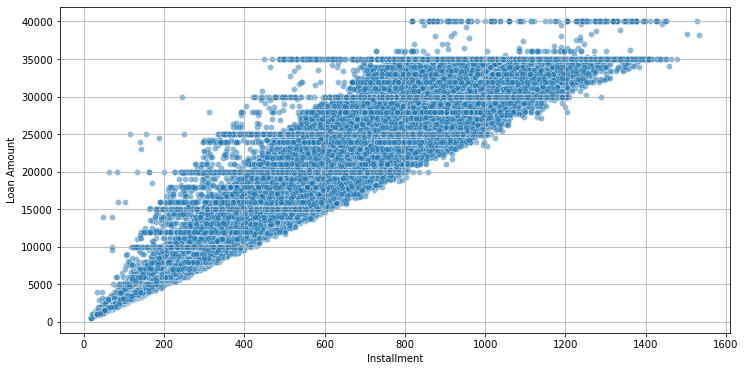

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['installment'],y=df['loan_amnt'],alpha=0.5)
plt.grid()
plt.xlabel('Installment')
plt.ylabel('Loan Amount')
#A positive correlation between loan amount and installment paid with visible overlapping which may be a result of loan grade and associated interest rate.

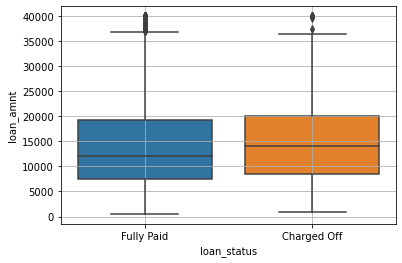

In [25]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
plt.grid()
#Majority of charged off loans as categorical variables share almost the same distribution in terms of instalment amount 

In [26]:
# CODE HERE
df.groupby(by='loan_status')['loan_amnt'].describe()
#The number of charged off loans is around 4 times the number of fully paid loans. 

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


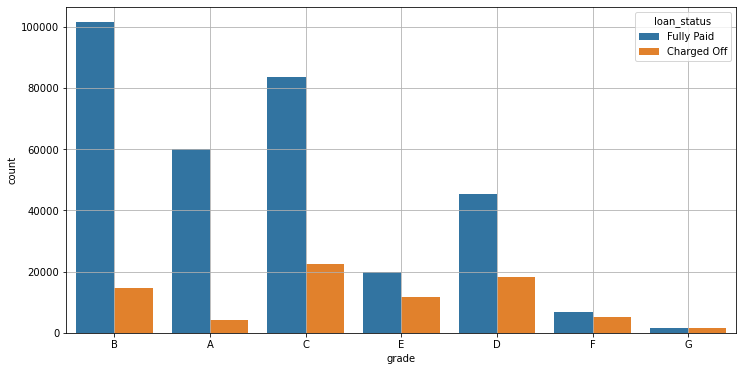

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='grade',data=df,hue='loan_status')
plt.grid()

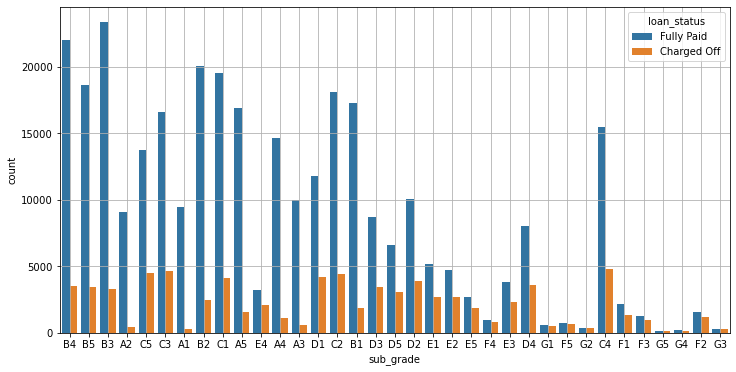

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade', data=df,hue='loan_status')
plt.grid()

In [29]:
# CODE 
df_loans_merge.sort_values(by='percentage_charge_offs',ascending=True)

,Aggregate Loans,Aggregate Charge Offs,percentage_charge_offs
A,64187,4036,6.287878
B,116018,14587,12.573049
C,105987,22449,21.180900
D,63524,18338,28.867829
E,31488,11765,37.363440
F,11772,5037,42.787971
G,3054,1461,47.838900


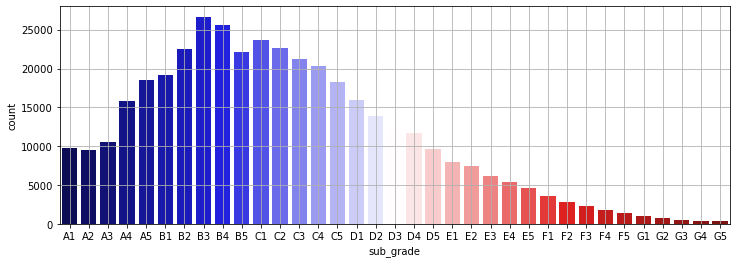

In [30]:
# CODE HERE
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='seismic')
plt.grid()

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

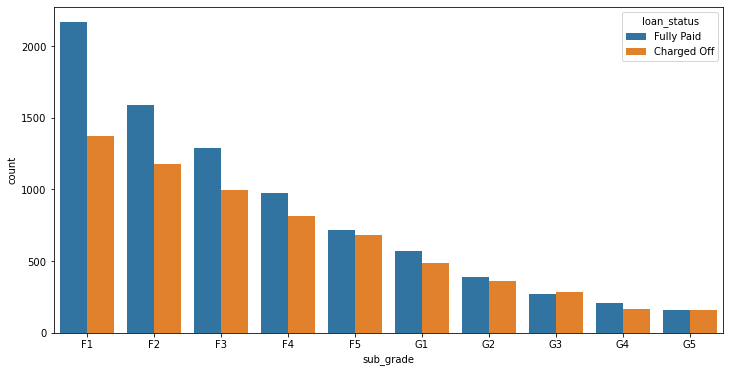

In [31]:
loans_FG = df[(df['grade']=='F')|(df['grade']=='G')]
sorted_loans_FG = sorted(loans_FG['sub_grade'].unique())
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=loans_FG, order=sorted_loans_FG,hue='loan_status')

In [32]:
# CODE HERE
x = df['loan_status'].unique()
x
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
loan_repaid             1.000000
Name: loan_repaid, dtype: float64


<AxesSubplot:>

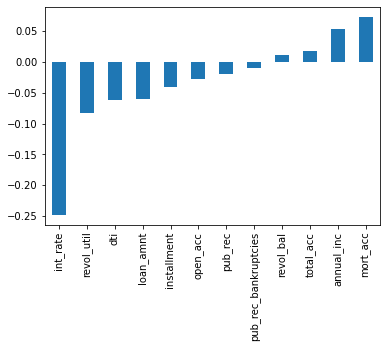

In [33]:
print(df.corr().loan_repaid)
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [34]:
#DATA PREPROCESSING

In [35]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [36]:
#DATA CLEANING AND FILLING

In [37]:
# CODE HERE
df.isnull().nunique()
#emp_title,emp_length,title,revol_util,mort_acc,pub_rec_bankruptcies

loan_amnt               1
term                    1
int_rate                1
installment             1
grade                   1
sub_grade               1
emp_title               2
emp_length              2
home_ownership          1
annual_inc              1
verification_status     1
issue_d                 1
loan_status             1
purpose                 1
title                   2
dti                     1
earliest_cr_line        1
open_acc                1
pub_rec                 1
revol_bal               1
revol_util              2
total_acc               1
initial_list_status     1
application_type        1
mort_acc                2
pub_rec_bankruptcies    2
address                 1
loan_repaid             1
dtype: int64

In [38]:
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [39]:
# CODE HERE
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [40]:
# Converting series to percentage
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [41]:
#df['emp_title']
#df['emp_length']
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [42]:
# Unique Employment Titles
df['emp_title'].nunique()

173105

In [43]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [44]:
# Employee title removed as job titles seem intractable via dummies
df.drop('emp_title',axis=1,inplace=True)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

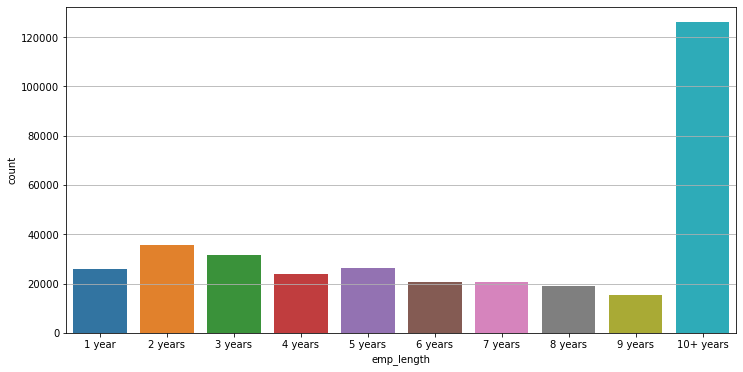

In [45]:
# Count plot of employee length column
(df['emp_length']).value_counts()
plt.figure(figsize=(12,6))
plt.grid()
x  = ['1 year','2 years','3 years','4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
sns.countplot(x='emp_length', data=df, order=x)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

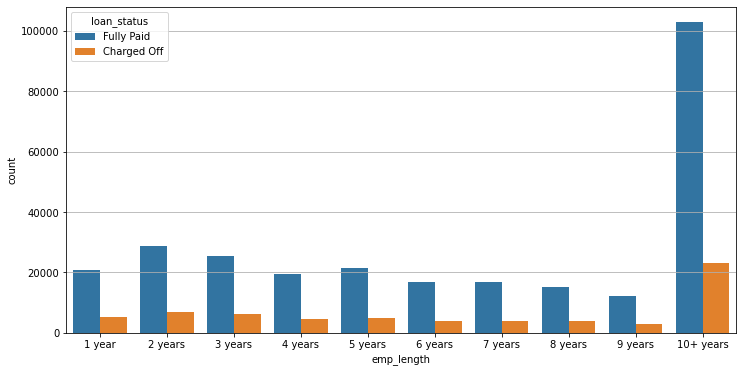

In [46]:
# Countplot of emp_length accprding to target
plt.figure(figsize=(12,6))
plt.grid()
sns.countplot(x='emp_length', data=df, order=x, hue='loan_status')

In [47]:
# Establishing relationship between employment length and being charged off
df_elen = df.groupby('emp_length').count()['loan_status'] #employee length
#emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
df_ch_off = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status'] #employee length
df_fp = df_elen-df_ch_off
#df_elen['Charged Off'] =100*df_ch_off/df_elen
emp_perc_co= 100*(df_ch_off)/df_elen
emp_perc_fp = 100*(df_fp/df_elen)

<AxesSubplot:xlabel='emp_length'>

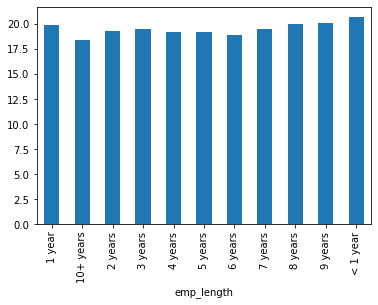

In [48]:
emp_perc_co.plot(kind='bar')

<AxesSubplot:xlabel='emp_length'>

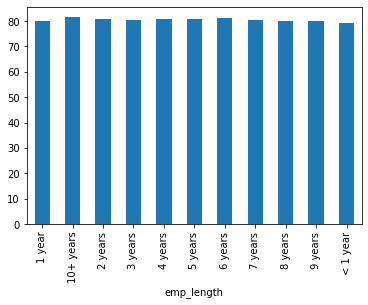

In [49]:
emp_perc_fp.plot(kind='bar')

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [50]:
# CODE HERE
df.drop('emp_length',axis=1,inplace=True)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [51]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [52]:
#title column
df['title'].head(5)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [53]:
#purpose column
df['purpose'].head(5)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [54]:
#Title column
df.drop('title',axis=1,inplace=True)

In [55]:
#info on mort_acc
feat_info('mort_acc')

Number of mortgage accounts.


Text(0.5, 0, 'mort_acc')

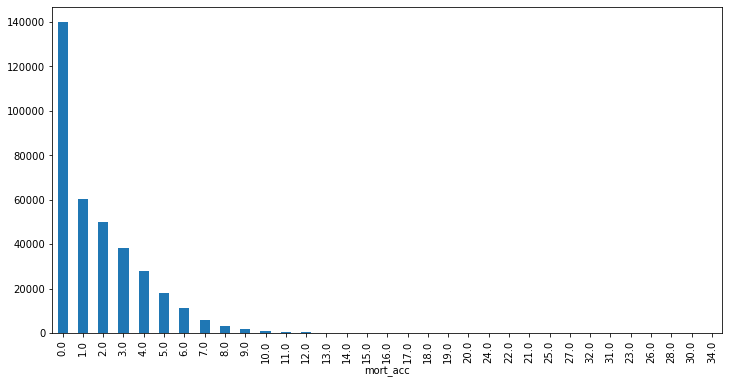

In [56]:
plt.figure(figsize=(12,6))
df['mort_acc'].value_counts().plot(kind='bar')
plt.xlabel('mort_acc')

In [57]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [58]:
#the total_acc feature correlates with the mort_acc which seems to makes sense Let's try this fillna() approach.
#Filling in missing values
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
def fill_mort_acc(total_acc,mort_acc):
    if(np.isnan(mort_acc)):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
df['mort_acc']=df.apply(lambda x:fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [59]:
# CODE HERE
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [60]:
100*(df.isnull().sum()/len(df))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [61]:
df.dropna(inplace=True)
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Non-numeric Columns to Dummies

In [62]:
# dtype
type(df)
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [63]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

### term feature

In [64]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [65]:
df.drop('grade',axis=1,inplace=True)

### grade feature

In [66]:
subg = pd.get_dummies(df['sub_grade'],drop_first=True)
subg

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df_subg = pd.concat([df.drop('sub_grade',axis=1),subg],axis=1)

In [68]:
df_subg

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df_subg.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [70]:
df_subg.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [71]:
#Conversion of ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables followed by concatenation
dum = pd.get_dummies(df_subg[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
df_subg_dr = pd.concat([df_subg.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dum],axis=1)
df_subg_dr.transpose()

,0,1,2,3,4,5,6,7,8,9,...,396020,396021,396022,396023,396024,396025,396026,396027,396028,396029
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0,20000.0,18000.0,13000.0,18900.0,26300.0,...,10000.0,3200.0,12000.0,22000.0,6000.0,10000.0,21000.0,5000.0,21000.0,2000.0
term,36,36,36,36,60,36,36,36,60,36,...,36,36,36,36,36,60,36,36,60,36
int_rate,11.44,11.99,10.49,6.49,17.27,13.33,5.32,11.14,10.99,16.29,...,9.76,5.42,12.29,18.92,13.11,10.99,12.29,9.99,15.31,13.61
installment,329.48,265.68,506.97,220.65,609.33,677.07,542.07,426.47,410.84,928.4,...,321.55,96.52,400.24,805.55,202.49,217.38,700.42,161.32,503.02,67.98
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,...,RENT,RENT,RENT,MORTGAGE,RENT,RENT,MORTGAGE,RENT,MORTGAGE,RENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
purpose_other,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
purpose_renewable_energy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
purpose_small_business,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
purpose_vacation,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# home_ownership

In [72]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

#### REMOVAL OF REDUNDANCY BY COMBINING NONE AND ANY IN HOME OWNERSHIP AS THEY RERESENT THE SAME THING

In [73]:
df['home_ownership'].replace(['NONE','ANY'],'OTHER')
dum=pd.get_dummies(df['home_ownership'],drop_first=True)
df_subg_dr=pd.concat([df_subg_dr.drop('home_ownership',axis=1),dum],axis=1)
df_subg_dr.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'MOR

In [74]:
#ZIP CODE FEATURE
print(df_subg_dr['address'][30])
df_subg_dr['address'][30][-5:]
df_subg_dr['zip_code'] = df_subg_dr['address'].apply(lambda x:x[-5:])
df_subg_dr['zip_code']

19223 Laurie Causeway Apt. 914
Barryton, MO 48052


0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: object

In [75]:
#Convert zip code to dummy variable for application
dum = pd.get_dummies(df_subg_dr['zip_code'],drop_first=True)
df_subg_dr = pd.concat([df_subg_dr.drop(['zip_code','address'],axis=1),dum],axis=1)

In [76]:
df_subg_dr

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,...,1,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,...,1,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
#issue_d is a speculative feature as it would not been known in advance and thus, needs to be dropped
df_subg_dr.drop(['issue_d'],axis=1,inplace=True)

In [78]:
#changing earliest_cr_line to earliest_cr_year
# earliest_cr_line appears to be a historical time stamp feature which needs to be converted to DateTime for extraction of year
df_subg_dr['earliest_cr_line'] = df_subg_dr['earliest_cr_line'].apply(lambda x: pd.to_datetime(x))
df_subg_dr['earliest_cr_year'] = df_subg_dr['earliest_cr_line'].apply(lambda x: x.year)
df_subg_dr['earliest_cr_year'].nunique()

65

In [79]:
df_subg_dr.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

In [80]:
df_subg_dr['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 395219, dtype: int64

## Train Test Split

## Testing on a sample for prediction of probability
Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

In [81]:
df_subg_dr = df_subg_dr.drop('loan_status',axis=1)

In [82]:
from sklearn.model_selection import train_test_split

Xd = df_subg_dr.drop(['loan_repaid','earliest_cr_line'],axis=1)
Yd = df_subg_dr['loan_repaid']
df_subg_dr = df_subg_dr.sample(frac=0.2)#Samling Fraction of Data
print('Fractional Length of dataset taken',len(df_subg_dr))
Xv, X, Yv, Y =  train_test_split(Xd, Yd, test_size=0.2)
#X=Xd
#Y=Yd
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

Fractional Length of dataset taken 79044


In [83]:
# SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#In case I use my own MLP/FCNN from my own library numpy based library


exec(open('Regression_Models/fcnn.py/fcnn.py').read())

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm
model = Sequential()

#input layer
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.3))

#hidden layer
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))

#Output layer
model.add(Dense(1, activation='sigmoid'))

#Model Optimization Loss
model.compile(loss='binary_crossentropy',optimizer='adam')
#Adam not optimizing very well for this problem

In [85]:
#Model Fitting and Evaluation
Xv = scaler.transform(Xv)
model.fit(X_train, Y_train, epochs=1000, batch_size=512, validation_data=(Xv,Yv))

Epoch 1/1000
124/124 [==============================] - 7s 16ms/step - loss: 0.5437 - val_loss: 0.4717
Epoch 2/1000
124/124 [==============================] - 1s 11ms/step - loss: 0.4549 - val_loss: 0.3882
Epoch 3/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.3834 - val_loss: 0.3229
Epoch 4/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.3307 - val_loss: 0.2812
Epoch 5/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2996 - val_loss: 0.2695
Epoch 6/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2872 - val_loss: 0.2656
Epoch 7/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2823 - val_loss: 0.2637
Epoch 8/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2780 - val_loss: 0.2626
Epoch 9/1000
124/124 [==============================] - 1s 11ms/step - loss: 0.2782 - val_loss: 0.2633
Epoch 10/1000
124/124 [==============================] - 1s 10ms/step - l

Epoch 80/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2620 - val_loss: 0.2611
Epoch 81/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2622 - val_loss: 0.2606
Epoch 82/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2617 - val_loss: 0.2609
Epoch 83/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2613 - val_loss: 0.2607
Epoch 84/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2615 - val_loss: 0.2616
Epoch 85/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2619 - val_loss: 0.2612
Epoch 86/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2611 - val_loss: 0.2610
Epoch 87/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2613 - val_loss: 0.2608
Epoch 88/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2615 - val_loss: 0.2607
Epoch 89/1000
124/124 [==============================] - 1s 10ms

124/124 [==============================] - 1s 9ms/step - loss: 0.2603 - val_loss: 0.2611
Epoch 159/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2608 - val_loss: 0.2625
Epoch 160/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2611 - val_loss: 0.2614
Epoch 161/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2598 - val_loss: 0.2613
Epoch 162/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2595 - val_loss: 0.2620
Epoch 163/1000
124/124 [==============================] - 1s 11ms/step - loss: 0.2603 - val_loss: 0.2615
Epoch 164/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2609 - val_loss: 0.2615
Epoch 165/1000
124/124 [==============================] - 1s 12ms/step - loss: 0.2593 - val_loss: 0.2625
Epoch 166/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2602 - val_loss: 0.2620
Epoch 167/1000
124/124 [==============================] - 1s 10ms/step - lo

124/124 [==============================] - 1s 10ms/step - loss: 0.2591 - val_loss: 0.2627
Epoch 237/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2600 - val_loss: 0.2618
Epoch 238/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2591 - val_loss: 0.2621
Epoch 239/1000
124/124 [==============================] - 1s 11ms/step - loss: 0.2599 - val_loss: 0.2638
Epoch 240/1000
124/124 [==============================] - 1s 11ms/step - loss: 0.2592 - val_loss: 0.2619
Epoch 241/1000
124/124 [==============================] - 2s 12ms/step - loss: 0.2590 - val_loss: 0.2626
Epoch 242/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2587 - val_loss: 0.2618
Epoch 243/1000
124/124 [==============================] - 2s 12ms/step - loss: 0.2585 - val_loss: 0.2620
Epoch 244/1000
124/124 [==============================] - 2s 13ms/step - loss: 0.2594 - val_loss: 0.2634
Epoch 245/1000
124/124 [==============================] - 1s 10ms/step

124/124 [==============================] - 1s 10ms/step - loss: 0.2587 - val_loss: 0.2622
Epoch 315/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2590 - val_loss: 0.2622
Epoch 316/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2592 - val_loss: 0.2623
Epoch 317/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2586 - val_loss: 0.2627
Epoch 318/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2593 - val_loss: 0.2624
Epoch 319/1000
124/124 [==============================] - 1s 11ms/step - loss: 0.2588 - val_loss: 0.2632
Epoch 320/1000
124/124 [==============================] - 1s 11ms/step - loss: 0.2586 - val_loss: 0.2629
Epoch 321/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2587 - val_loss: 0.2640
Epoch 322/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2590 - val_loss: 0.2630
Epoch 323/1000
124/124 [==============================] - 1s 9ms/step -

124/124 [==============================] - 1s 11ms/step - loss: 0.2588 - val_loss: 0.2641
Epoch 393/1000
124/124 [==============================] - 1s 11ms/step - loss: 0.2585 - val_loss: 0.2644
Epoch 394/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2576 - val_loss: 0.2646
Epoch 395/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2591 - val_loss: 0.2646
Epoch 396/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2591 - val_loss: 0.2655
Epoch 397/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2584 - val_loss: 0.2652
Epoch 398/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2583 - val_loss: 0.2644
Epoch 399/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2594 - val_loss: 0.2650
Epoch 400/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2588 - val_loss: 0.2644
Epoch 401/1000
124/124 [==============================] - 1s 10ms/step -

124/124 [==============================] - 1s 10ms/step - loss: 0.2580 - val_loss: 0.2677
Epoch 471/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2579 - val_loss: 0.2656
Epoch 472/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2581 - val_loss: 0.2665
Epoch 473/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2587 - val_loss: 0.2662
Epoch 474/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2582 - val_loss: 0.2656
Epoch 475/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2584 - val_loss: 0.2657
Epoch 476/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2588 - val_loss: 0.2661
Epoch 477/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2584 - val_loss: 0.2668
Epoch 478/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2577 - val_loss: 0.2663
Epoch 479/1000
124/124 [==============================] - 1s 11ms/step - 

124/124 [==============================] - 1s 11ms/step - loss: 0.2576 - val_loss: 0.2666
Epoch 549/1000
124/124 [==============================] - 1s 12ms/step - loss: 0.2580 - val_loss: 0.2666
Epoch 550/1000
124/124 [==============================] - 1s 12ms/step - loss: 0.2575 - val_loss: 0.2690
Epoch 551/1000
124/124 [==============================] - 1s 12ms/step - loss: 0.2584 - val_loss: 0.2669
Epoch 552/1000
124/124 [==============================] - 1s 11ms/step - loss: 0.2576 - val_loss: 0.2672
Epoch 553/1000
124/124 [==============================] - 1s 12ms/step - loss: 0.2582 - val_loss: 0.2670
Epoch 554/1000
124/124 [==============================] - 2s 12ms/step - loss: 0.2589 - val_loss: 0.2673
Epoch 555/1000
124/124 [==============================] - 1s 11ms/step - loss: 0.2582 - val_loss: 0.2673
Epoch 556/1000
124/124 [==============================] - 1s 12ms/step - loss: 0.2583 - val_loss: 0.2675
Epoch 557/1000
124/124 [==============================] - 1s 11ms/step

124/124 [==============================] - 1s 10ms/step - loss: 0.2577 - val_loss: 0.2690
Epoch 627/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2578 - val_loss: 0.2683
Epoch 628/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2578 - val_loss: 0.2694
Epoch 629/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2584 - val_loss: 0.2690
Epoch 630/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2573 - val_loss: 0.2689
Epoch 631/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2573 - val_loss: 0.2679
Epoch 632/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2585 - val_loss: 0.2692
Epoch 633/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2580 - val_loss: 0.2700
Epoch 634/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2573 - val_loss: 0.2690
Epoch 635/1000
124/124 [==============================] - 1s 10ms/step

124/124 [==============================] - 1s 10ms/step - loss: 0.2573 - val_loss: 0.2707
Epoch 705/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2578 - val_loss: 0.2706
Epoch 706/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2577 - val_loss: 0.2690
Epoch 707/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2575 - val_loss: 0.2694
Epoch 708/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2574 - val_loss: 0.2704
Epoch 709/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2583 - val_loss: 0.2691
Epoch 710/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2580 - val_loss: 0.2702
Epoch 711/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2579 - val_loss: 0.2708
Epoch 712/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2576 - val_loss: 0.2722
Epoch 713/1000
124/124 [==============================] - 1s 10ms/step

124/124 [==============================] - 1s 9ms/step - loss: 0.2580 - val_loss: 0.2718
Epoch 783/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2581 - val_loss: 0.2710
Epoch 784/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2575 - val_loss: 0.2722
Epoch 785/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2573 - val_loss: 0.2721
Epoch 786/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2573 - val_loss: 0.2710
Epoch 787/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2573 - val_loss: 0.2711
Epoch 788/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2582 - val_loss: 0.2710
Epoch 789/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2575 - val_loss: 0.2724
Epoch 790/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2579 - val_loss: 0.2716
Epoch 791/1000
124/124 [==============================] - 1s 9ms/step - loss:

124/124 [==============================] - 1s 10ms/step - loss: 0.2569 - val_loss: 0.2735
Epoch 861/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2580 - val_loss: 0.2727
Epoch 862/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2578 - val_loss: 0.2732
Epoch 863/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2575 - val_loss: 0.2718
Epoch 864/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2574 - val_loss: 0.2732
Epoch 865/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2583 - val_loss: 0.2724
Epoch 866/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2579 - val_loss: 0.2726
Epoch 867/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2574 - val_loss: 0.2710
Epoch 868/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2578 - val_loss: 0.2731
Epoch 869/1000
124/124 [==============================] - 1s 9ms/step - loss:

124/124 [==============================] - 1s 10ms/step - loss: 0.2570 - val_loss: 0.2744
Epoch 939/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2570 - val_loss: 0.2740
Epoch 940/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2574 - val_loss: 0.2743
Epoch 941/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2577 - val_loss: 0.2727
Epoch 942/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2580 - val_loss: 0.2740
Epoch 943/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2579 - val_loss: 0.2740
Epoch 944/1000
124/124 [==============================] - 1s 10ms/step - loss: 0.2567 - val_loss: 0.2738
Epoch 945/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2584 - val_loss: 0.2721
Epoch 946/1000
124/124 [==============================] - 1s 9ms/step - loss: 0.2573 - val_loss: 0.2746
Epoch 947/1000
124/124 [==============================] - 1s 9ms/step - loss

In [86]:
from tensorflow.keras.models import load_model
model.save('loans_model_project.h5')

<AxesSubplot:>

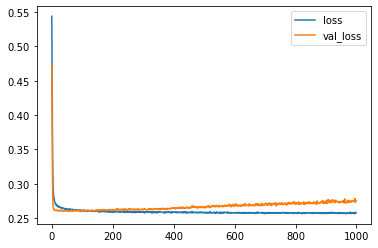

In [87]:
#Model Evaluation
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [88]:
#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
prob = model.predict(X_test)
predictions = (prob> 0.5).astype("int32")
#predictions = model.predict_classes(X_test)#Deprecated predict_classes
print('Classification Report')
print(classification_report(predictions,Y_test))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(predictions,Y_test))
print(prob)

Classification Report
              precision    recall  f1-score   support

           0       0.46      0.95      0.62      1485
           1       0.99      0.88      0.93     14324

    accuracy                           0.89     15809
   macro avg       0.72      0.92      0.78     15809
weighted avg       0.94      0.89      0.90     15809



Confusion Matrix
[[ 1411    74]
 [ 1688 12636]]
[[1.       ]
 [0.82459  ]
 [1.       ]
 ...
 [0.8229138]
 [0.8301283]
 [1.       ]]


**TEST TO ASCERTAIN A CANDIDATE FOR LOAN**

In [205]:
import random
random_ind = random.randint(0,len(df_subg_dr))
#df_subg_dr['loan_repaid']
new_customer = df_subg_dr.drop(['loan_repaid','earliest_cr_line','loan_repaid'],axis=1).iloc[random_ind]

In [206]:
new_customer=new_customer.to_frame()#Conversion of series into dataframe
new_customer = new_customer.transpose()

In [207]:
new_customer.shape

(1, 80)

##### ACTUAL LOAN STATUS

In [208]:
df_subg_dr['loan_repaid'].iloc[random_ind]

1

In [209]:
new_customer.columns.transpose()

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'MORTGAGE', 'NONE', 'OTHER',
       'OWN', 'RENT', '05113', '11650', '22690', '29597', '30

In [210]:
#FAILED ATTEMPT HERE-WORKED OUT A SIMPLER ROUTE LATER
#new_customer.drop('emp_length',axis=1,inplace=True)
#new_customer.drop('title',axis=1,inplace=True)

#subg = pd.get_dummies(new_customer['sub_grade'],drop_first=True)
#new_customer = pd.concat([new_customer.drop('sub_grade',axis=1),subg],axis=1)
#
#dum = pd.get_dummies(new_customer[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
#new_customer = pd.concat([new_customer.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dum],axis=1)
#new_customer['home_ownership'].replace(['NONE','ANY'],'OTHER')
#
#dum=pd.get_dummies(new_customer['home_ownership'],drop_first=True)
#new_customer=pd.concat([new_customer.drop('home_ownership',axis=1),dum],axis=1)
#
#new_customer['zip_code'] = new_customer['address'].apply(lambda x:x[-5:])
#dum = pd.get_dummies(new_customer['zip_code'],drop_first=True)
#new_customer = pd.concat([new_customer.drop(['zip_code','address'],axis=1),dum],axis=1)
#
#new_customer.drop(['issue_d'],axis=1,inplace=True)
#
#new_customer['earliest_cr_line'] = new_customer['earliest_cr_line'].apply(lambda x: pd.to_datetime(x))
#new_customer['earliest_cr_year'] = new_customer['earliest_cr_line'].apply(lambda x: x.year)
#new_customer = new_customer.drop(['earliest_cr_line'],axis=1)

### PREDICTED LOAN STATUS

In [213]:
#nc = 
nc=new_customer.values.reshape(1,80)
nc = scaler.transform(nc)
nc=new_customer
prob = model.predict(nc)
nc_predict = (prob > 0.5).astype("int32")
print('PREDICTED LOAN STATUS',nc_predict)

PREDICTED LOAN STATUS [[1]]


### ACTUAL LOAN STATUS

In [214]:
df_subg_dr['loan_repaid'].iloc[random_ind]

1